In [89]:
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [91]:
y = pd.read_csv('/Users/sameekshabs/Downloads/week 4 - Nashville_housing_data.csv')
y

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,NaN,ANTIOCH,10/13/2016,20161019-0110290,No,No,...,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,NaN,ANTIOCH,10/26/2016,20161102-0115842,No,No,...,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,NaN,ANTIOCH,10/28/2016,20161031-0114817,No,No,...,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,10/28/2016,20161102-0115988,No,No,...,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


In [92]:
#Checkin the total misisng Values 
y.isna().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [93]:
#PART 1: Data Cleaning 

#Dropping unnecessary variables from the dataset
y.drop(['Unnamed: 0', 'Parcel ID', 'Suite/ Condo   #', 'Legal Reference', 'Property Address'], axis=1, inplace=True)

#Exctracting the year from the  column sale date
y['Sale Year'] = pd.to_datetime(y['Sale Date']).dt.year
y.drop(['Sale Date'], axis=1, inplace=True)

#Filling the missing values with mean for the integer datatypes
mean_half_bath = y['Half Bath'].mean()
y['Half Bath'].fillna(mean_half_bath, inplace=True)

mean_full_bath = y['Full Bath'].mean()
y['Full Bath'].fillna(mean_full_bath, inplace=True)

mean_bedrooms = y['Bedrooms'].mean()
y['Bedrooms'].fillna(mean_bedrooms, inplace=True)

mean_finished_area = y['Finished Area'].mean()
y['Finished Area'].fillna(mean_finished_area, inplace=True)

#Filling missing values for categeory variables using mode imputation
mode_foundation = y['Foundation Type'].mode()[0]
y['Foundation Type'].fillna(mode_foundation, inplace=True)

y = y.dropna()

In [94]:
#Creating dummies 
y = pd.get_dummies(y, columns=['Land Use', 'Property City', 'Sold As Vacant', 'Multiple Parcels Involved in Sale',  'City', 'State', 'Tax District', 'Foundation Type', 'Exterior Wall', 'Grade'], drop_first=True, dummy_na=False)


In [95]:
print(y.dtypes)

Acreage           float64
Neighborhood        int64
Land Value          int64
Building Value      int64
Finished Area     float64
                   ...   
Grade_E             uint8
Grade_OFB           uint8
Grade_OFC           uint8
Grade_SSC           uint8
Grade_X             uint8
Length: 62, dtype: object


In [96]:
# Specify the categorical variable
categorical_var = 'Sale Price Compared To Value'

# Perform one-hot encoding 
dummy_df = pd.get_dummies(y[categorical_var], prefix=categorical_var)

# Concatenate the dummy variables with the original DataFrame
y = pd.concat([y, dummy_df], axis=1)

# Drop the original categorical variable if desired
y.drop(categorical_var, axis=1, inplace=True)

In [98]:
y

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Sale Year,...,Grade_B,Grade_C,Grade_D,Grade_E,Grade_OFB,Grade_OFC,Grade_SSC,Grade_X,Sale Price Compared To Value_Over,Sale Price Compared To Value_Under
0,0.17,3127,32000,134400,1149.00000,1941,2.0,1.0,0.0,2013,...,0,1,0,0,0,0,0,0,1,0
1,0.11,9126,34000,157800,2090.82495,2000,3.0,2.0,1.0,2013,...,0,1,0,0,0,0,0,0,1,0
2,0.17,3130,25000,243700,2145.60001,1948,4.0,2.0,0.0,2013,...,1,0,0,0,0,0,0,0,0,1
3,0.34,3130,25000,138100,1969.00000,1910,2.0,1.0,0.0,2013,...,0,1,0,0,0,0,0,0,0,1
4,0.17,3130,25000,86100,1037.00000,1945,2.0,1.0,0.0,2013,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,0.38,6328,25000,105000,1758.00000,1996,3.0,2.0,0.0,2016,...,0,1,0,0,0,0,0,0,1,0
22647,0.27,6328,25000,142400,2421.00000,1996,3.0,3.0,0.0,2016,...,0,1,0,0,0,0,0,0,1,0
22648,0.23,6328,25000,159300,3117.00000,1995,3.0,3.0,0.0,2016,...,0,1,0,0,0,0,0,0,1,0
22649,0.15,126,40000,204100,1637.00000,2004,3.0,2.0,1.0,2016,...,1,0,0,0,0,0,0,0,1,0


In [99]:
#Part 2: Logistic Regression Model

import statsmodels.api as sm
z=y[['Sale Price Compared To Value_Over']]
x=y.drop(['Sale Price Compared To Value_Over'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, z, test_size=0.20)


X = sm.add_constant(x_train) 
model = sm.OLS(y_train, X).fit()
print(model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Sale Price Compared To Value_Over   R-squared:                       1.000
Model:                                           OLS   Adj. R-squared:                  1.000
Method:                                Least Squares   F-statistic:                 4.590e+23
Date:                               Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                                       16:28:50   Log-Likelihood:             4.2989e+05
No. Observations:                              18119   AIC:                        -8.597e+05
Df Residuals:                                  18067   BIC:                        -8.593e+05
Df Model:                                         51                                         
Covariance Type:                           nonrobust                                         
                                             coef    std err

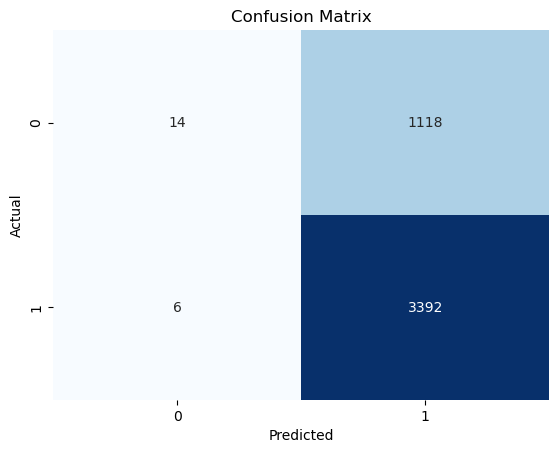

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Sale Price Compared To Value_Over' is your target variable
y = y['Sale Price Compared To Value_Over']

# Assuming the rest of the columns are your features
X = x

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Create confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score


accuracy_score(y_test, z_pred)


0.7501103752759382

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, z_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1132
           1       0.75      1.00      0.86      3398

    accuracy                           0.75      4530
   macro avg       0.38      0.50      0.43      4530
weighted avg       0.56      0.75      0.64      4530



/Users/sameekshabs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sameekshabs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sameekshabs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
#Part3: Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, min_samples_leaf=5)   
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [104]:
from sklearn import tree
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_3 <= 1727400.00
|   |--- feature_8 <= 1.50
|   |   |--- feature_4 <= 578.00
|   |   |   |--- class: 0
|   |   |--- feature_4 >  578.00
|   |   |   |--- feature_45 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_45 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_8 >  1.50
|   |   |--- feature_0 <= 0.30
|   |   |   |--- feature_9 <= 2013.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  2013.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  0.30
|   |   |   |--- feature_9 <= 2014.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_9 >  2014.50
|   |   |   |   |--- class: 1
|--- feature_3 >  1727400.00
|   |--- feature_61 <= 0.50
|   |   |--- feature_4 <= 7884.75
|   |   |   |--- class: 1
|   |   |--- feature_4 >  7884.75
|   |   |   |--- feature_5 <= 1999.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  1999.00
|   |   |   |   |--- class: 1
|   |--- feature_61 >  0.50
|   |   |--- class: 1



In [105]:
#Accuracy
z_predict = dt_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,z_predict)

0.7494481236203091

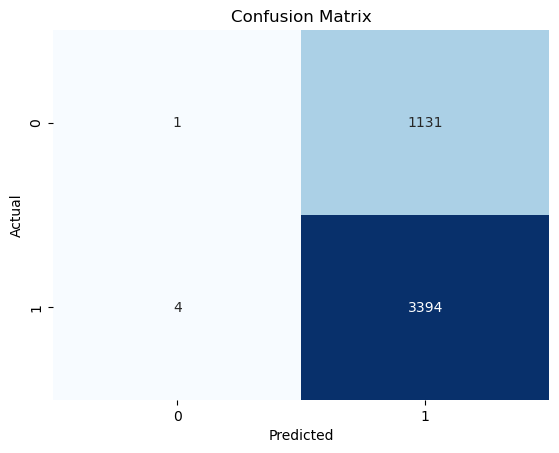

              precision    recall  f1-score   support

           0       0.20      0.00      0.00      1132
           1       0.75      1.00      0.86      3398

    accuracy                           0.75      4530
   macro avg       0.48      0.50      0.43      4530
weighted avg       0.61      0.75      0.64      4530



In [106]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, z_predict)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, z_predict))

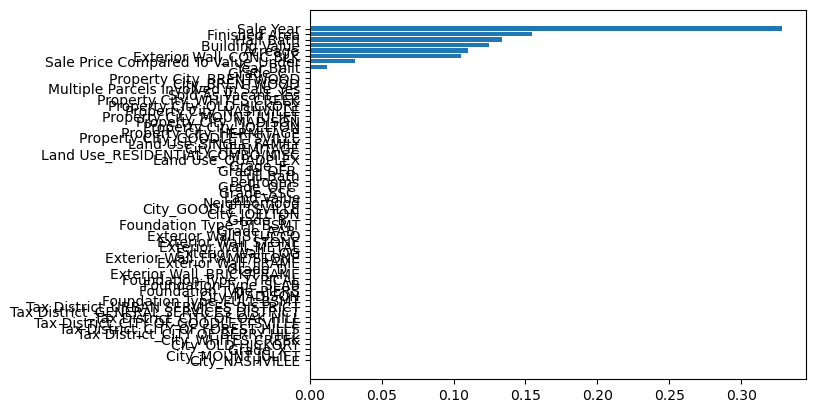

In [107]:
# Assuming we have a decision tree model trained and stored in dt_model
importances = dt_model.feature_importances_

# Sort indices in ascending order based on feature importances
indices = np.argsort(importances)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])

# Set y-axis ticks and labels with sorted feature names
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

# Display the plot
plt.show()



In [108]:
#PART 4: Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [109]:
#Accuracy

zrf_predict = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,zrf_predict)

0.7501103752759382

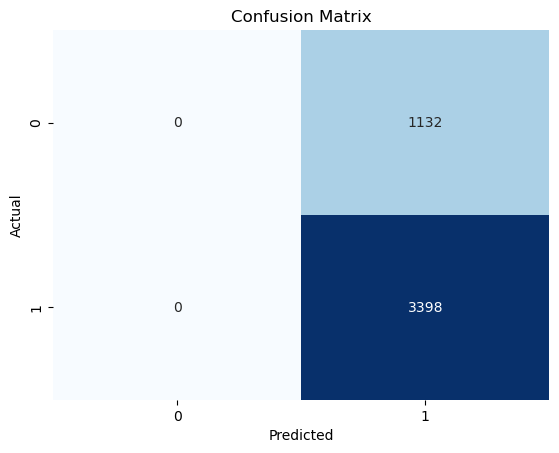

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1132
           1       0.75      1.00      0.86      3398

    accuracy                           0.75      4530
   macro avg       0.38      0.50      0.43      4530
weighted avg       0.56      0.75      0.64      4530



/Users/sameekshabs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sameekshabs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sameekshabs/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, zrf_predict)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, zrf_predict))

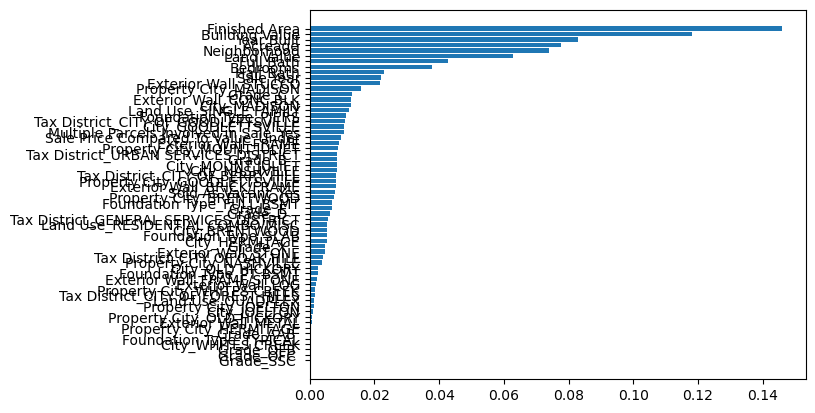

In [111]:
# Assuming we have a randon forest model trained and stored in rf_model
importances = rf_model.feature_importances_

# Sort indices in ascending order based on feature importances
indices = np.argsort(importances)

# Create a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])

# Set y-axis ticks and labels with sorted feature names
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

# Display the plot
plt.show()


In [112]:
#PART 5: Gradient Boosting Model

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [113]:
#Accuracy
zgb_predict = gb_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,zgb_predict)

0.7487858719646799

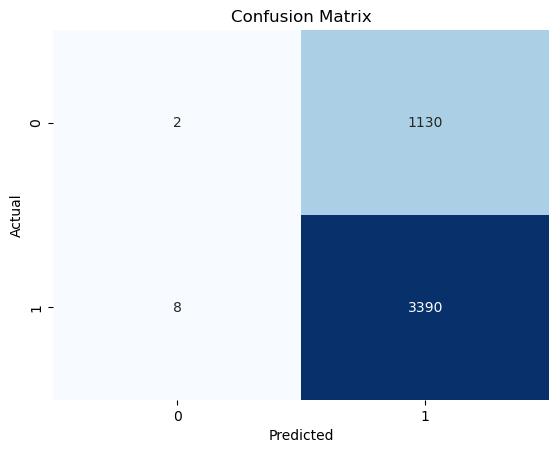

              precision    recall  f1-score   support

           0       0.20      0.00      0.00      1132
           1       0.75      1.00      0.86      3398

    accuracy                           0.75      4530
   macro avg       0.47      0.50      0.43      4530
weighted avg       0.61      0.75      0.64      4530



In [114]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, zgb_predict)

sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, zgb_predict))